# 📊 Análise de Desempenho — Merge + Bubble Sort (Thresholds < 30)
Este notebook analisa apenas os resultados para thresholds **menores que 30**.

O threshold `-1` é tratado como **'Merge'** puro.

As curvas teóricas de referência incluem:
- $n·\log_2(n)$
- $n^2$
- $n$ (linear)


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do CSV
df = pd.read_csv("merge-bubble-summary_results.csv")

# Filtrar apenas thresholds < 30
df_filtered = df[df["Threshold"] < 30].copy()

# Substituir -1 por 'Merge' no label
df_filtered["Threshold"] = df_filtered["Threshold"].replace(-1, "Merge")

df_filtered.head()


,Tamanho,Threshold,MediaCPU,DesvioCPU,MediaReal,DesvioReal
0,3,Merge,0.000001,0.0,0.000002,0.000001
9,3,28,0.000001,0.0,0.000001,0.000000
10,3,26,0.000001,0.0,0.000002,0.000001
11,3,24,0.000001,0.0,0.000001,0.000000
12,3,22,0.000001,0.0,0.000001,0.000000


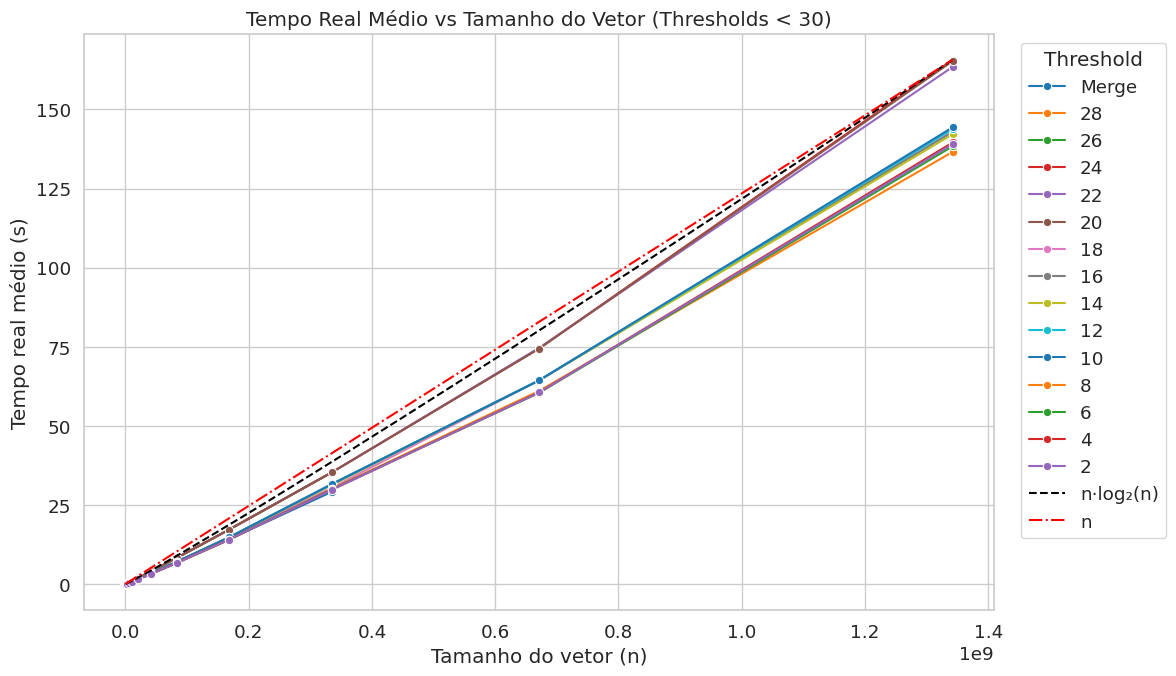

In [10]:

sns.set(style="whitegrid", font_scale=1.2)

# Valores contínuos para curvas teóricas
n_vals = np.linspace(df_filtered["Tamanho"].min(), df_filtered["Tamanho"].max(), 200)

# --- Gráfico de Tempo Real ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x="Tamanho", y="MediaReal", hue="Threshold", marker="o", palette="tab10")
plt.title("Tempo Real Médio vs Tamanho do Vetor (Thresholds < 30)")
plt.xlabel("Tamanho do vetor (n)")
plt.ylabel("Tempo real médio (s)")

# Escalas
max_obs_real = df_filtered["MediaReal"].max()

# n·log(n)
nlogn = n_vals * np.log2(n_vals)
plt.plot(n_vals, nlogn * (max_obs_real / nlogn.max()), '--', color='black', label='n·log₂(n)')

# n
n_line = n_vals
plt.plot(n_vals, n_line * (max_obs_real / n_line.max()), '-.', color='red', label='n')

plt.legend(title="Threshold", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


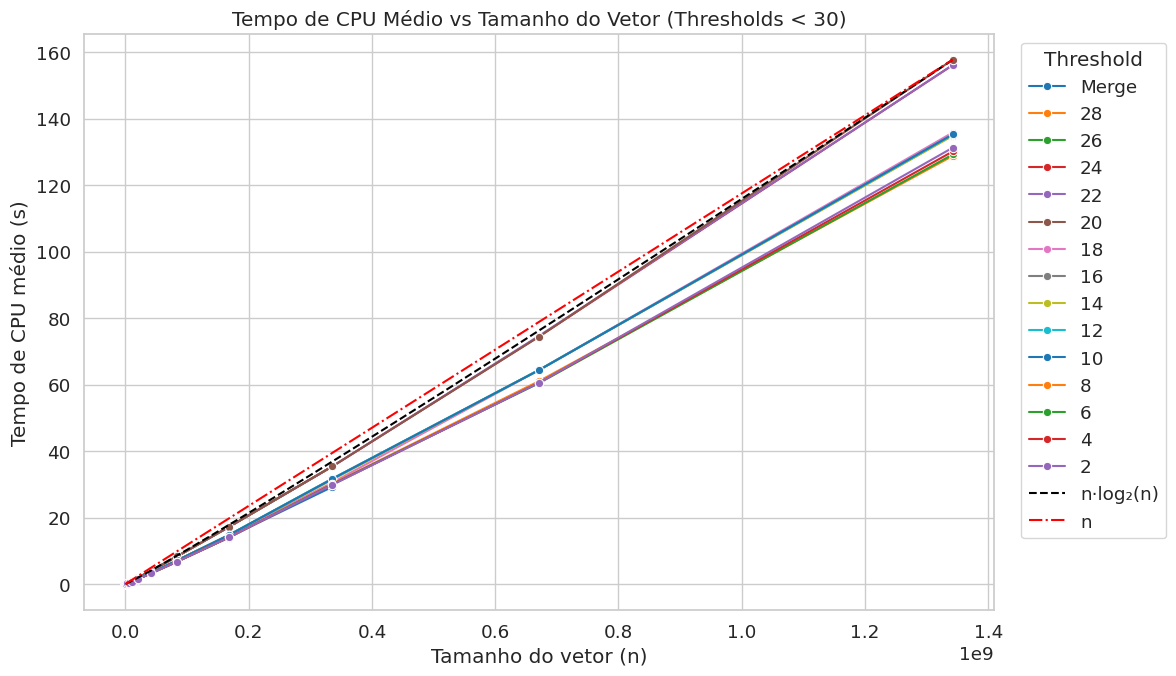

In [11]:

# --- Gráfico de Tempo de CPU ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x="Tamanho", y="MediaCPU", hue="Threshold", marker="o", palette="tab10")
plt.title("Tempo de CPU Médio vs Tamanho do Vetor (Thresholds < 30)")
plt.xlabel("Tamanho do vetor (n)")
plt.ylabel("Tempo de CPU médio (s)")

max_obs_cpu = df_filtered["MediaCPU"].max()

# n·log(n)
nlogn = n_vals * np.log2(n_vals)
plt.plot(n_vals, nlogn * (max_obs_cpu / nlogn.max()), '--', color='black', label='n·log₂(n)')

# n
n_line = n_vals
plt.plot(n_vals, n_line * (max_obs_cpu / n_line.max()), '-.', color='red', label='n')

plt.legend(title="Threshold", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
